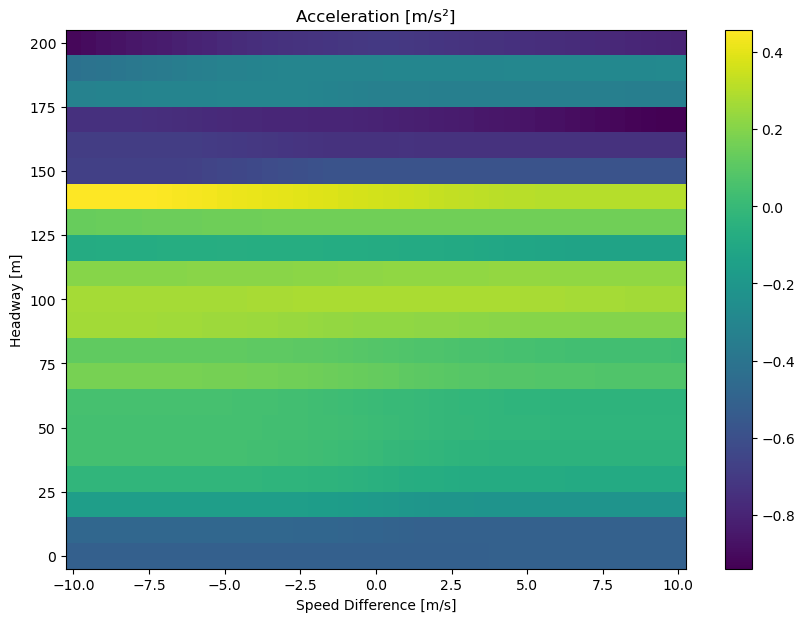

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import math

data = pd.read_csv('cf_data.csv')

# Define the number of evenly spaced values for dv and s
num_dv_values = 41
num_s_values = 21

# Create arrays for dv and s using numpy.linspace
dv = np.linspace(-10, 10, num_dv_values)
s = np.linspace(0, 200, num_s_values)

# Create the grid 'a' with zeros
a = np.zeros((num_s_values, num_dv_values))

# Algorithm to populate 'a' with acceleration values
upsilon = 1.5  # m/s
sigma = 30     # m

for i in range(num_s_values):
    for j in range(num_dv_values):
        s_value = s[i]
        dv_value = dv[j]
        
        acceleration = 0
        total_weight = 0
        
        for k in range(len(data)):
            dv_measurement = data['dv'].iloc[k]
            s_measurement = data['s'].iloc[k]
            
            weight = math.exp(-(abs(s_measurement - s_value) / upsilon) - (abs(dv_measurement - dv_value) / sigma))
            
            acceleration += weight * data['a'].iloc[k]
            total_weight += weight
        
        a[i][j] = acceleration / total_weight

# Create a meshgrid for dv and s
X, Y = np.meshgrid(dv, s)

# Create the pseudocolor plot
fig, axs = plt.subplots(figsize=(10, 7))
p = axs.pcolormesh(X, Y, a, shading='auto')

# Set the title and axis labels
axs.set_title('Acceleration [m/s²]')
axs.set_xlabel('Speed Difference [m/s]')
axs.set_ylabel('Headway [m]')

# Add a colorbar to the plot
cbar = fig.colorbar(p)

# Show the plot
plt.show()
